In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = yf.download("BNB-USD", start="2021-03-25", end="2022-03-25")#Download data from yahoo finance for Solana Coin

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,249.465912,250.139236,227.294067,234.885437,234.885437,2314734091
2021-03-26,234.790939,255.104568,234.790939,255.104568,255.104568,2099285452
2021-03-27,255.116486,275.593384,250.494797,269.102325,269.102325,2457659540
2021-03-28,269.310730,280.992401,262.288666,269.191284,269.191284,2527142069
2021-03-29,268.969391,277.479004,265.367828,275.214630,275.214630,2067448661


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,390.738953,398.961731,386.561371,396.447815,396.447815,1657341491
2022-03-22,396.355591,409.642548,395.575745,404.314941,404.314941,1795119554
2022-03-23,404.327271,411.029572,398.855865,408.609772,408.609772,1645651129
2022-03-24,408.554260,416.505402,406.011566,414.126984,414.126984,1831451218
2022-03-25,414.239624,415.580750,411.876007,414.496826,414.496826,1743834112


In [5]:
data['Adj Close'].head()

Date
2021-03-25    234.885437
2021-03-26    255.104568
2021-03-27    269.102325
2021-03-28    269.191284
2021-03-29    275.214630
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

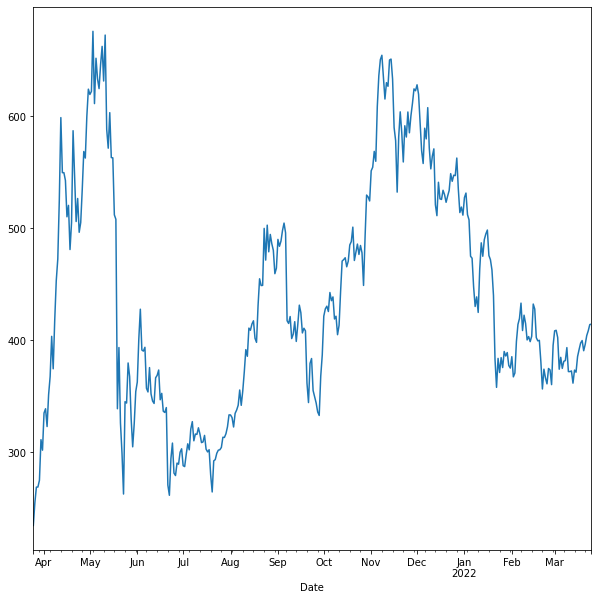

In [6]:
data['Adj Close'].plot(figsize=(10, 10), subplots=True)#Shows price movement for the last year

In [7]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.0860808218975185,
 0.05487066359231399,
 0.00033057588814627446,
 0.02237570939794986,
 0.13157677341004606]

In [8]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.08257564037934838,
 0.05341816566144049,
 0.00033052125997615,
 0.0221290459453118,
 0.12361203479281384]

In [9]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))


The annulized normal return is 1.15041676 and its annulized volatility is 1.07028852


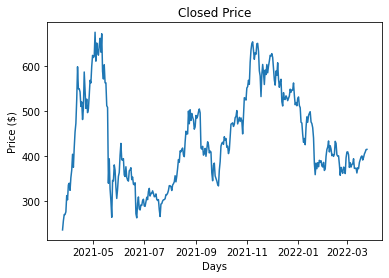

In [10]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

In [11]:
import os

In [12]:
S0 = 249.47            # spot assest price as at 19:27 11/03/2022
K = 500                 # strike
T = 1.0                 # maturity 
r = 0.0152                 # risk free rate 
sig = 1.0703               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [13]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u        

In [14]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [15]:
S

array([[ 249.47      ,  462.79151477,  858.52401547, 1592.64692983],
       [   0.        ,  134.47800773,  249.47      ,  462.79151477],
       [   0.        ,    0.        ,   72.49101921,  134.47800773],
       [   0.        ,    0.        ,    0.        ,   39.07663383]])

In [16]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.35411025928753287

In [17]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V


array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  37.20848523],
       [  0.        ,   0.        ,   0.        , 365.52199227],
       [  0.        ,   0.        ,   0.        , 460.92336617]])

In [18]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[290.77274477, 167.79748311,  23.91112176,   0.        ],
       [  0.        , 360.48091022, 248.00307362,  37.20848523],
       [  0.        ,   0.        , 424.98205441, 365.52199227],
       [  0.        ,   0.        ,   0.        , 460.92336617]])

In [19]:
print('European ' + payoff, str( V[0,0]))

European put 290.7727447740869


In [20]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[294.58439467, 169.42135046,  23.91112176,   0.        ],
       [  0.        , 365.52199227, 250.53      ,  37.20848523],
       [  0.        ,   0.        , 427.50898079, 365.52199227],
       [  0.        ,   0.        ,   0.        , 460.92336617]])

In [21]:
print('American ' + payoff, str( V[0,0]))

American put 294.5843946728761


In [22]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [23]:
T = 1/52
r = 0.0152
sigma = 1.0703 
S0 = 249.47
K = 500

In [24]:
S = mcs_simulation_np(1000)

In [25]:
S = np.transpose(S)
S

array([[249.47      , 252.11681313, 250.73648327, ..., 312.23784631,
        313.05797536, 311.35691299],
       [249.47      , 250.76878504, 249.84308979, ..., 220.1489083 ,
        218.88236418, 218.24356017],
       [249.47      , 250.74916941, 249.45401214, ..., 186.29027388,
        184.92343481, 184.92771226],
       ...,
       [249.47      , 247.28041894, 248.88968642, ..., 268.4969599 ,
        268.59760066, 269.95675037],
       [249.47      , 247.10770273, 246.64368127, ..., 140.76234348,
        141.48228815, 141.48529788],
       [249.47      , 248.82417684, 248.44573337, ..., 274.86017601,
        276.25366136, 275.64881726]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

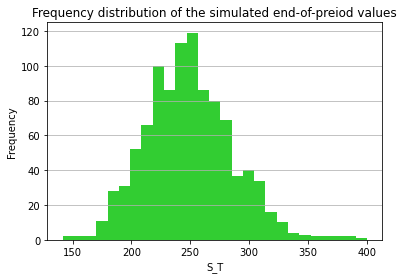

In [33]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#32cd32',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [34]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 250.9330887840588


In [28]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.0
